# Jessica Williams Capstone Exploratory Data Analysis(EDA)

We are now looking at a dataframe of recipe attributes that contains 223 columns and 231637 rows. I also added the original raw recipes csv in the event that I want to access more of the raw data.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from yellowbrick.text import FreqDistVisualizer
from pathlib import Path
nlp=spacy.load('en_core_web_sm')
from textblob import TextBlob, Word, Blobber

from sb_utils import save_file

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.ensemble import RandomForestRegressor


In [2]:
raw_recipes = pd.read_csv('RAW_recipes.csv')

In [3]:
recipe_attributes = pd.read_csv('C:/Users/jwatki8/Downloads/My Capstone project/recipe_attributes2.csv')

In [4]:
recipe_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Columns: 225 entries, name to ingr_wine
dtypes: float64(215), int64(3), object(7)
memory usage: 397.6+ MB


In [5]:
recipe_attributes.head()

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,ingr_sugar,ingr_sweet,ingr_tomato,ingr_tomatoes,ingr_vanilla,ingr_vegetable,ingr_vinegar,ingr_water,ingr_white,ingr_wine
0,arriba baked winter squash mexican style,137739,55.0,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11.0,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a bit different breakfast pizza,31490,30.0,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9.0,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,all in the kitchen chili,112140,130.0,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6.0,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,alouette potatoes,59389,45.0,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11.0,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,amish tomato ketchup for canning,44061,190.0,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5.0,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(recipe_attributes.columns.values.tolist())

['name', 'recipe_id', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition', 'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients', 'rating_mean', 'review_count', 'avg_review_len', 'polarity_avg', 'step_10', 'step_15', 'step_20', 'step_30', 'step_350', 'step_add', 'step_aside', 'step_bake', 'step_baking', 'step_beat', 'step_boil', 'step_bowl', 'step_bring', 'step_brown', 'step_butter', 'step_cheese', 'step_chicken', 'step_combine', 'step_cook', 'step_cooked', 'step_cooking', 'step_cool', 'step_cover', 'step_cream', 'step_cup', 'step_cut', 'step_degrees', 'step_dish', 'step_drain', 'step_dry', 'step_egg', 'step_eggs', 'step_flour', 'step_garlic', 'step_golden', 'step_half', 'step_heat', 'step_high', 'step_hot', 'step_hour', 'step_hours', 'step_inch', 'step_ingredients', 'step_juice', 'step_just', 'step_large', 'step_let', 'step_lightly', 'step_low', 'step_make', 'step_medium', 'step_milk', 'step_minutes', 'step_mix', 'step_mixture', 'step_oil', 'step_onion', 'step_on

In [7]:
recipe_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Columns: 225 entries, name to ingr_wine
dtypes: float64(215), int64(3), object(7)
memory usage: 397.6+ MB


In [8]:
counts = recipe_attributes.isna().sum()
print(counts.sum())
#print(counts.sort_values())
#recipe_attributes_sub2.isnull().value_counts.groupby(columns)

0


Just to do a bit of tidying up, I think it is a good idea to convert the recipe id column to a string as this is the unique id for the recipes and not a numeric variable. Also I want to convert the minutes column to an integer.

In [9]:
recipe_attributes=recipe_attributes.astype({'recipe_id':'str'})

In [10]:
recipe_attributes=recipe_attributes.astype({'minutes':'int'})

First I would like to examine some of the numeric(count) attributes for the recipes. I want to see check on the number range.

In [11]:
print('n_ingredients range is:', (recipe_attributes['n_ingredients'].min(), recipe_attributes['n_ingredients'].max()))

n_ingredients range is: (1.0, 43.0)


In [12]:
print('minutes range is:', (recipe_attributes['minutes'].min(), recipe_attributes['minutes'].max()))

minutes range is: (0, 2147483647)


In [13]:
print('n_steps range is:', (recipe_attributes['n_steps'].min(), recipe_attributes['n_steps'].max()))

n_steps range is: (0.0, 145.0)


It looks like there could be some pretty strange outliers for these coloumns of the dataframe. There are some large nearly impossible values in the 'minutes' and 'n_steps' columns.

Currently it is safe to assume that the target variable will be rating mean for the recipes. But I would like to do a small cross check to see if the recipes with the highest review count also have the highest mean rating.

In [14]:
recipe_attributes.sort_values('review_count', ascending=False).head(20)

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,ingr_sugar,ingr_sweet,ingr_tomato,ingr_tomatoes,ingr_vanilla,ingr_vegetable,ingr_vinegar,ingr_water,ingr_white,ingr_wine
22168,best banana bread,2886,65,1762,1999-09-26,"['time-to-make', 'course', 'main-ingredient', ...","[272.8, 16.0, 97.0, 14.0, 7.0, 31.0, 14.0]",13.0,"['remove odd pots and pans from oven', 'prehea...",you'll never need another banana bread recipe ...,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213826,to die for crock pot roast,27208,545,28201,2002-05-03,"['weeknight', 'time-to-make', 'course', 'main-...","[295.2, 14.0, 0.0, 15.0, 99.0, 19.0, 0.0]",7.0,"['place beef roast in crock pot', 'mix the dri...","amazing flavor, and so simple! no salt needed ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66687,crock pot chicken with black beans cream cheese,89204,243,137839,2004-04-16,"['time-to-make', 'course', 'main-ingredient', ...","[679.2, 53.0, 39.0, 38.0, 91.0, 75.0, 16.0]",5.0,"['take 4-5 frozen , yes , frozen , boneless ch...",i love this crock-pot chicken recipe for two r...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62431,creamy cajun chicken pasta,39087,25,30534,2002-09-02,"['30-minutes-or-less', 'time-to-make', 'course...","[719.1, 63.0, 12.0, 34.0, 78.0, 120.0, 15.0]",4.0,['place chicken and cajun seasoning in a bowl ...,n'awlin's style of chicken with an updated alf...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22388,best ever banana cake with cream cheese frosting,67256,75,82367,2003-07-24,"['weeknight', 'time-to-make', 'course', 'main-...","[503.5, 31.0, 222.0, 15.0, 11.0, 61.0, 25.0]",18.0,"['preheat oven to 275f', 'grease and flour a 9...",this is one of (if not) the best banana cake i...,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
229262,yes virginia there is a great meatloaf,54257,80,24670,2003-02-17,"['time-to-make', 'course', 'main-ingredient', ...","[493.1, 43.0, 75.0, 52.0, 70.0, 55.0, 7.0]",15.0,['meatloaf: combine meat loaf ingredients and ...,absolutely delicious meatloaf and sauce! those...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115303,jo mama s world famous spaghetti,22782,80,25455,2002-03-17,"['weeknight', 'time-to-make', 'course', 'main-...","[555.9, 40.0, 45.0, 85.0, 59.0, 45.0, 16.0]",10.0,"['in large , heavy stockpot , brown italian sa...",my kids will give up a steak dinner for this s...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574,whatever floats your boat brownies,32204,35,37305,2002-06-25,"['60-minutes-or-less', 'time-to-make', 'course...","[390.7, 30.0, 161.0, 7.0, 12.0, 50.0, 17.0]",14.0,"['preheat oven to 350f', 'grease an 8 inch squ...","these are absolutely the chewiest, moistest, f...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118161,kittencal s italian melt in your mouth meatballs,69173,50,89831,2003-08-20,"['60-minutes-or-less', 'time-to-make', 'course...","[1312.6, 129.0, 8.0, 108.0, 214.0, 174.0, 8.0]",5.0,['mix all ingredients together in a large bowl...,cooking the meatballs in simmering pasta sauce...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114444,japanese mum s chicken,68955,45,29196,2003-08-13,"['60-minutes-or-less', 'time-to-make', 'course...","[313.1, 19.0, 54.0, 61.0, 62.0, 17.0, 5.0]",5.0,['place all the ingredients in a saucepan over...,"we have a japanese girl, tomoko, living with u...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
recipe_attributes.sort_values('rating_mean', ascending=False).head(20)

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,ingr_sugar,ingr_sweet,ingr_tomato,ingr_tomatoes,ingr_vanilla,ingr_vegetable,ingr_vinegar,ingr_water,ingr_white,ingr_wine
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11.0,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125098,littlemafia s apple cider,395272,10,678366,2009-10-19,"['15-minutes-or-less', 'time-to-make', 'course...","[12.1, 0.0, 12.0, 0.0, 0.0, 0.0, 1.0]",1.0,"['mix together and boil for 10 minutes , then ...",one of my favorite drinks.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125089,little vanilla pound cake for 2,369222,35,1105991,2009-05-04,"['60-minutes-or-less', 'time-to-make', 'course...","[545.1, 38.0, 204.0, 11.0, 14.0, 72.0, 24.0]",17.0,"['preheat oven to 350', 'grease and flour pan ...",this is my favorite little vanilla pound cake....,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125090,little veronica s healthy macaroni and cheese ...,177041,17,168896,2006-07-10,"['30-minutes-or-less', 'time-to-make', 'course...","[694.1, 49.0, 14.0, 26.0, 53.0, 64.0, 24.0]",9.0,"['boil pasta according to package directions',...",my daughter loves cheese but to avoid giving h...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125093,little west end,228449,6,199213,2007-05-17,"['15-minutes-or-less', 'time-to-make', 'course...","[67.8, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",3.0,"['shake with ice', 'serve in an iced glass', '...",from a pub in the bahamas.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125094,little wild sorrel and herb tarts with melted ...,382861,75,242729,2009-07-26,"['weeknight', 'time-to-make', 'course', 'main-...","[670.7, 73.0, 7.0, 20.0, 42.0, 148.0, 13.0]",17.0,"['preheat the oven to 170c', 'for the pastry ,...",a delicious and different way to use sorrel le...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125095,little s chicken and pasta soup,399838,30,678366,2009-11-17,"['weeknight', '30-minutes-or-less', 'time-to-m...","[341.2, 8.0, 32.0, 21.0, 34.0, 6.0, 18.0]",4.0,"['fry the onion until soft and golden', 'add t...","from ""fast chicken"" / the hawthorn series\r\nt...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125097,little bitty coffee hazelnut biscotti,5134,0,1545,1999-12-01,"['15-minutes-or-less', 'time-to-make', 'course...","[8.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]",19.0,"['heat oven to 375 degrees', 'line a cookie sh...",originally from,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125102,littlemafia s chili dipping sauce,395354,10,678366,2009-10-19,"['15-minutes-or-less', 'time-to-make', 'course...","[21.6, 0.0, 2.0, 42.0, 4.0, 0.0, 0.0]",2.0,['combine all ingredients except scallions in ...,from southeast asia.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125048,little king salad,295279,30,28729,2008-03-30,"['30-minutes-or-less', 'time-to-make', 'course...","[488.2, 66.0, 10.0, 54.0, 36.0, 54.0, 2.0]",3.0,"['mix up your salad ingredients', 'add the dre...","remember little king subs? well, here is a sal...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


It doesn’t look like these top scores in these to categories cross at all. There also seems to somewhat of an inverse relationship where the recipes with perfect rating means also have a fairly low number of reviews. I would like to explore this relationship further.

In [16]:
recipe_attributes.sort_values('minutes', ascending=False).head(20)

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,ingr_sugar,ingr_sweet,ingr_tomato,ingr_tomatoes,ingr_vanilla,ingr_vegetable,ingr_vinegar,ingr_water,ingr_white,ingr_wine
144074,no bake granola balls,261647,2147483647,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9.0,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109624,how to preserve a husband,447963,1051200,576273,2011-02-01,"['time-to-make', 'course', 'preparation', 'for...","[407.4, 57.0, 50.0, 1.0, 7.0, 115.0, 5.0]",9.0,"['be careful in your selection', ""don't choose...","found this in a local wyoming cookbook ""a coll...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12.0,"['rinse the fruit or berries , fruit must be c...",this should be a nice easy project for those w...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18.0,"['equipement:', 'very large pan - to hold 12 p...","mead, made from fermented honey, was the earli...",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106963,homemade vanilla,425681,259205,28177,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9.0,['slice the vanilla beans length-wise and scra...,found this recipe on tammy's blog (http://www....,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155044,peach brandy,98912,216015,34146,2004-09-01,"['time-to-make', 'course', 'main-ingredient', ...","[3645.3, 3.0, 2040.0, 0.0, 16.0, 0.0, 173.0]",9.0,"['use only fully ripened , unblemished fruit',...",posted in reply to a message board request for,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,angelica liqueur,70551,201610,59064,2003-09-04,"['weeknight', 'time-to-make', 'course', 'cuisi...","[891.8, 0.0, 906.0, 0.0, 1.0, 0.0, 76.0]",7.0,"['crush the fennel , aniseed , coriander seeds...",finish off a large meal with a tiny glass of t...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
177906,rumtopf,12931,187200,5060,2001-10-20,"['weeknight', 'time-to-make', 'course', 'main-...","[11510.6, 10.0, 6543.0, 2.0, 51.0, 5.0, 579.0]",16.0,"['in a 8 quart stockpot , combine sugar and wa...",rumtopf is a traditional german delicious frui...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170999,raspberry liqueur,172114,172810,83093,2006-06-09,"['time-to-make', 'course', 'main-ingredient', ...","[91.5, 0.0, 35.0, 0.0, 0.0, 0.0, 3.0]",7.0,['rinse the berries & cut into small pieces or...,if you love chambord as i do but suffer sticke...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53721,cinnamon extract,153634,172800,208121,2006-01-30,"['time-to-make', 'course', 'preparation', 'for...","[14.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",5.0,"['put ingredients in container', 'combine', 'p...",a no brainer.. so why didn't i think of it? \r...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Looking at the columns by descending minutes, it looks like there are a few extreme outliers. I think I am going to drop theses so they don’t skew the summary statistics for this column. The rest of the higher minutes values seem at least feasible and won’t skew the statistics for the column too far.

In [17]:
recipe_attributes = recipe_attributes[recipe_attributes.recipe_id != '261647'] 
recipe_attributes = recipe_attributes[recipe_attributes.recipe_id != '447963']

Lets take a look at a few other features and examine the values in descending order.

In [18]:
recipe_attributes.sort_values('n_steps', ascending=False).head(10)

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,ingr_sugar,ingr_sweet,ingr_tomato,ingr_tomatoes,ingr_vanilla,ingr_vegetable,ingr_vinegar,ingr_water,ingr_white,ingr_wine
78633,easy yeast bread with variations,158120,210,182358,2006-02-28,"['time-to-make', 'course', 'preparation', 'hea...","[1784.5, 62.0, 104.0, 151.0, 103.0, 42.0, 99.0]",145.0,"['white bread:', 'lightly spooning flour into ...",found online in response to a request and now ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51528,chocolate raspberry mousse truffle cake rasp...,192468,240,232669,2006-10-27,"['time-to-make', 'course', 'main-ingredient', ...","[697.4, 57.0, 249.0, 9.0, 13.0, 105.0, 29.0]",113.0,"['make the chocolate sour cream cake:', 'prehe...","this recipe is the winner, hands down! just in...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51532,chocolate raspberry ruffle cake,156874,1080,10033,2006-02-21,"['time-to-make', 'course', 'main-ingredient', ...","[5080.8, 616.0, 967.0, 25.0, 147.0, 1211.0, 12...",110.0,['first of all: these are not typical directio...,"alice medrich recipe, found in baking with jul...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1627,5 cheese crab lasagna with roasted garlic and ...,65007,245,87300,2003-06-18,"['weeknight', 'time-to-make', 'course', 'main-...","[442.8, 35.0, 27.0, 33.0, 50.0, 60.0, 10.0]",108.0,['roast garlic: place oven rack on second notc...,"this creamy, gooey, gorgeous white lasagna wil...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70088,death by chocolate a la trellis,356724,1680,467583,2009-02-19,"['time-to-make', 'course', 'main-ingredient', ...","[1460.8, 189.0, 262.0, 14.0, 50.0, 380.0, 36.0]",100.0,"['take a deep breath', ""make sure that you wil...",warning: this dessert is not meant to be eaten...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220404,vampire s kiss cake,537089,2930,2002205938,2018-10-03,"['time-to-make', 'course', 'preparation', 'occ...","[1117.6, 64.0, 542.0, 28.0, 11.0, 71.0, 60.0]",98.0,"['make your batter', 'preheat your oven to 350...",beware the kiss of the vampire! or instead you...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220003,universal muffins mix,205025,23,427781,2007-01-12,"['30-minutes-or-less', 'time-to-make', 'course...","[551.5, 2.0, 189.0, 51.0, 27.0, 3.0, 40.0]",97.0,"['combine ingredients and break up any lumps',...",this is a recipe for muffin base mix.\r\ni lea...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22150,best authentic mexican tamales ever,454787,360,746976,2011-05-02,"['course', 'cuisine', 'preparation', 'main-dis...","[5618.6, 563.0, 52.0, 724.0, 436.0, 315.0, 129.0]",93.0,"['cook and shred pork roast:', 'start with 1 p...",authentic tamales are a lot of work but soooo ...,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
36413,carioca,65378,355,186071,2003-06-23,"['weeknight', 'time-to-make', 'course', 'prepa...","[6998.6, 744.0, 1517.0, 39.0, 284.0, 1111.0, 1...",90.0,['for the genoise: preheat the oven to 350 deg...,recipe adapted from pierre herme. this is a fa...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54890,classic pumpkin pie for expats,284729,180,752914,2008-02-07,"['time-to-make', 'course', 'main-ingredient', ...","[282.3, 23.0, 86.0, 13.0, 6.0, 11.0, 11.0]",88.0,['this recipe is involved and could take a goo...,living abroad has it's ups and downs. not bein...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
recipe_attributes.sort_values('n_ingredients', ascending=False).head(10)

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,ingr_sugar,ingr_sweet,ingr_tomato,ingr_tomatoes,ingr_vanilla,ingr_vegetable,ingr_vinegar,ingr_water,ingr_white,ingr_wine
2162,a to z bread,3748,80,1535,1999-10-30,"['time-to-make', 'course', 'main-ingredient', ...","[367.0, 30.0, 101.0, 10.0, 9.0, 12.0, 14.0]",12.0,"['in a mixing bowl , combine the sugar , oil a...",an extremely versatile bread. very moist and d...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139659,morton thompson turkey,258192,330,546010,2007-10-11,"['main-ingredient', 'poultry', 'turkey', 'meat...","[1437.0, 99.0, 80.0, 65.0, 258.0, 105.0, 25.0]",39.0,"['preheat oven to 500f', 'chop fine the reserv...","a family tradtiion since 2005! in my opinion, ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230245,z best two faced jerk,234840,70,377070,2007-06-14,"['time-to-make', 'cuisine', 'preparation', 'so...","[627.0, 40.0, 191.0, 46.0, 73.0, 29.0, 21.0]",39.0,"['day or afternoon before:', 'mix up jerk', 'm...",there's two faces to every jerk - a sweet face...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116744,kato s garage style tomato sauce meatba...,113677,270,128473,2005-03-18,"['time-to-make', 'course', 'main-ingredient', ...","[412.8, 36.0, 61.0, 47.0, 46.0, 38.0, 8.0]",9.0,"['spicy tomatoe & vegetable sauce', 'in a larg...",this is our favourite spagetti dinner...we mak...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18352,basic fried rice with variations,248707,55,305531,2007-08-25,"['60-minutes-or-less', 'time-to-make', 'course...","[793.3, 22.0, 8.0, 23.0, 37.0, 13.0, 48.0]",16.0,"['dice or shred meat and vegetables', 'heat oi...",another recipe that i acquired from a chinese ...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
119626,land and sea white meat version of surf and turf,116469,105,58104,2005-04-12,"['time-to-make', 'course', 'main-ingredient', ...","[995.5, 79.0, 59.0, 27.0, 145.0, 77.0, 19.0]",46.0,"['for salsa-', 'mix all ingredients and chill ...",i just had to put together a fabulous dinner u...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203614,sunday supper taco salad bowls tacos,502219,240,695000,2013-06-23,"['time-to-make', 'course', 'cuisine', 'prepara...","[10687.7, 1784.0, 49.0, 67.0, 59.0, 802.0, 26.0]",6.0,['heat vegetable oil to 350f submerge tortilla...,being served again at the free sunday supper o...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71669,dhansak with brown rice,50461,165,6357,2003-01-08,"['weeknight', 'time-to-make', 'course', 'main-...","[1549.3, 80.0, 74.0, 7.0, 167.0, 109.0, 62.0]",35.0,['clean and soak the dals in water for 30 minu...,from today's,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23572,bill s calzones,183279,480,206101,2006-08-27,"['ham', 'time-to-make', 'course', 'main-ingred...","[405.1, 35.0, 62.0, 51.0, 32.0, 38.0, 10.0]",40.0,"['for sauce:', 'brown 1 / 2 lb of the sausage ...",this is my husband bill's own personal calzone...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55542,coconut chicken fingers with mango rum salsa,161329,120,34061,2006-03-24,"['time-to-make', 'course', 'main-ingredient', ...","[2034.2, 105.0, 181.0, 62.0, 248.0, 103.0, 63.0]",25.0,['debone chicken breasts and cut the chicken b...,i like this recipe because it is easy and fast...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Nothing seems to out of the ordinary here. Now I would like to take a look at those columns in ascending order as they shouldn't contain zeros as values.

In [20]:
recipe_attributes.sort_values('n_ingredients', ascending=True).head(10)

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,ingr_sugar,ingr_sweet,ingr_tomato,ingr_tomatoes,ingr_vanilla,ingr_vegetable,ingr_vinegar,ingr_water,ingr_white,ingr_wine
127894,macadamia nut butter,371048,5,482933,2009-05-09,"['15-minutes-or-less', 'time-to-make', 'course...","[3590.2, 582.0, 91.0, 1.0, 79.0, 301.0, 23.0]",2.0,['simply place the nuts in a heavy-duty food p...,many recipes call for it and it's not readily ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147822,one ingredient soft caramel,17568,240,23302,2002-01-19,"['weeknight', 'time-to-make', 'course', 'main-...","[171.7, 7.0, 116.0, 2.0, 8.0, 14.0, 9.0]",20.0,"['for an easy caramel topping or dip , simply ...","this is, without a doubt, the easiest way on e...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103771,healthy salt substitute,134711,10,193499,2005-08-24,"['15-minutes-or-less', 'time-to-make', 'course...","[230.4, 3.0, 105.0, 48.0, 19.0, 3.0, 14.0]",4.0,"['cut up the celery into fairly small pieces',...",i need to change this description again. at f...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6499,apple cider reduction,521756,155,171084,2015-04-19,"['time-to-make', 'course', 'preparation', 'low...","[14.4, 0.0, 0.0, 8.0, 0.0, 0.0, 1.0]",13.0,"['in 6-8 quart stock pan , measure out 2 cups ...",i saw a post about this on facebook and gave i...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
106735,homemade panko japanese bread crumbs,376622,5,157167,2009-06-10,"['15-minutes-or-less', 'time-to-make', 'cuisin...","[199.5, 3.0, 12.0, 21.0, 11.0, 2.0, 12.0]",5.0,['carefully trim only the brown crust from fre...,"i was cooking with a japanese friend, and she ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106736,homemade panko bread crumbs,167729,23,108843,2006-05-11,"['30-minutes-or-less', 'time-to-make', 'course...","[354.7, 6.0, 23.0, 28.0, 20.0, 4.0, 22.0]",6.0,['push chunks of white bread through the shred...,this recipe is from bellaonline.com. i don't u...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133565,melted sugar glue for candy houses,442917,9,593927,2010-11-27,"['lactose', '15-minutes-or-less', 'time-to-mak...","[774.0, 0.0, 798.0, 0.0, 0.0, 0.0, 66.0]",4.0,"['pour sugar into a heavy pot', 'place over me...","to hold the pieces together instead of icing, ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86040,freezing eggs,153034,35,249074,2006-01-23,"['60-minutes-or-less', 'time-to-make', 'main-i...","[11.9, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0]",37.0,"['items needed:', 'eggs', 'ziplock bags , vari...",a tried & true method to have eggs in your hou...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133374,melba toast,24802,15,23302,2002-04-09,"['15-minutes-or-less', 'time-to-make', 'course...","[133.0, 2.0, 8.0, 10.0, 7.0, 1.0, 8.0]",5.0,['preheat the broiler to high and toast the br...,homemade melba toast has the edge on the bough...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118205,kittencal s method for oven cooked bacon,367843,27,89831,2009-04-25,"['bacon', '30-minutes-or-less', 'time-to-make'...","[3116.2, 471.0, 0.0, 236.0, 157.0, 510.0, 1.0]",7.0,"['preheat oven to 400 degrees f', 'for easy cl...",when i make this i make lots and then freeze i...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
recipe_attributes.sort_values('n_steps', ascending=True).head(10)

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,ingr_sugar,ingr_sweet,ingr_tomato,ingr_tomatoes,ingr_vanilla,ingr_vegetable,ingr_vinegar,ingr_water,ingr_white,ingr_wine
3381,all season bread,176767,90,331268,2006-07-10,"['time-to-make', 'course', 'main-ingredient', ...","[198.8, 11.0, 70.0, 18.0, 5.0, 5.0, 10.0]",0.0,[],just change the fruit/vegetable in this recipe...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
217446,tuna parmesan spread,359282,10,37636,2009-03-05,"['15-minutes-or-less', 'time-to-make', 'course...","[177.7, 14.0, 5.0, 5.0, 39.0, 22.0, 0.0]",1.0,['mix together and spread on toast points or c...,great for a budget conscious lunch.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4085,almost like montreal steak seasoning,235504,10,354628,2007-06-19,"['15-minutes-or-less', 'time-to-make', 'course...","[12.1, 0.0, 1.0, 72.0, 1.0, 0.0, 0.0]",1.0,['mix all & store in a glass container'],i love montreal steak seasoning on almost anyt...,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
126036,low carb eggnog frosty,119762,3,134663,2005-04-29,"['15-minutes-or-less', 'time-to-make', 'course...","[205.9, 33.0, 0.0, 1.0, 2.0, 68.0, 0.0]",1.0,['put everything in blender and mix on high un...,an eggnog milkshake that is just as easy as it...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126074,low carb jello dessert,115095,5,157785,2005-04-02,"['15-minutes-or-less', 'time-to-make', 'course...","[172.2, 16.0, 39.0, 12.0, 12.0, 46.0, 4.0]",1.0,['mix well and chill'],a quick and easy dessert for the low carb dieter.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126076,low carb ketchup,119682,5,134663,2005-04-29,"['15-minutes-or-less', 'time-to-make', 'course...","[7.4, 0.0, 4.0, 6.0, 0.0, 0.0, 0.0]",1.0,['mix all ingredients together and serve'],simple and delicious sugarfree ketchup!,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217471,tuna pea salad,360863,5,96177,2009-03-14,"['15-minutes-or-less', 'time-to-make', 'course...","[199.3, 11.0, 21.0, 14.0, 34.0, 8.0, 5.0]",1.0,"['combine ingredients , chill at least 3 hours...","crisp and delightful tuna salad, served on cra...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126155,low carb protein ice cream,424584,25,710042,2010-05-11,"['30-minutes-or-less', 'time-to-make', 'course...","[128.8, 20.0, 0.0, 1.0, 2.0, 41.0, 0.0]",1.0,"[""pour into machine and let it run it's cycle""]",made with protein powder and cream to make it ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126181,low carb seafood cocktail sauce,119223,5,37636,2005-04-26,"['15-minutes-or-less', 'time-to-make', 'course...","[1.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1.0,['stir together and serve'],wonderful with chilled shrimp.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126194,low carb spaghetti squash pie,120194,25,134663,2005-05-01,"['30-minutes-or-less', 'time-to-make', 'course...","[83.2, 6.0, 9.0, 3.0, 10.0, 6.0, 1.0]",1.0,"['mix together all the ingredients , pour into...","this can also be made with maple, banana or bu...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


It looks like the ingredient column has no zeros listed which is great. The steps column however does contain a zero as well as quite a few ones. Even though it is highly unlike like that a recipes would have only one step, at this stage in our process it is too soon to drop a row for having one step. However I think it is safe to drop the row with zero steps.

In [22]:
recipe_attributes = recipe_attributes[recipe_attributes.recipe_id != '176767'] 

In [23]:
recipe_attributes.sort_values('minutes', ascending=True).head(20)

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,ingr_sugar,ingr_sweet,ingr_tomato,ingr_tomatoes,ingr_vanilla,ingr_vegetable,ingr_vinegar,ingr_water,ingr_white,ingr_wine
127089,low fat fitness energy bars,3710,0,1533,1999-10-28,"['15-minutes-or-less', 'time-to-make', 'course...","[84.2, 1.0, 45.0, 0.0, 3.0, 0.0, 6.0]",17.0,"['preheat oven to 350 degrees', 'spread oats ,...","ohhh my, i made these and they taste so good, ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42415,chicken a la king ii,3020,0,1555,1999-09-21,"['15-minutes-or-less', 'time-to-make', 'course...","[291.0, 22.0, 15.0, 34.0, 15.0, 41.0, 10.0]",9.0,['saute green pepper and mushrooms in butter i...,0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
106510,homemade dill pickles,3273,0,1812,1999-10-11,"['15-minutes-or-less', 'time-to-make', 'course...","[53.3, 0.0, 20.0, 0.0, 4.0, 0.0, 4.0]",3.0,"['bring water , vinegar and salt to a boil', '...","(don't miss this one, you will never buy pickl...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42373,chicken n vegetable stir fry,7413,0,145448,2000-03-06,"['15-minutes-or-less', 'time-to-make', 'main-i...","[338.6, 32.0, 9.0, 43.0, 51.0, 21.0, 3.0]",17.0,"['in large skillet , heat oil and cook chicken...",this is a recipe that i adopted. i love anyth...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12026,baby shrimp and tarragon mustard,8140,0,39547,2000-03-13,"['15-minutes-or-less', 'time-to-make', 'course...","[67.2, 9.0, 4.0, 2.0, 2.0, 16.0, 0.0]",6.0,"['mix the mustard , lemon juice , vinegar , an...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22086,berry good mousse,3504,0,1533,1999-10-19,"['15-minutes-or-less', 'time-to-make', 'course...","[94.7, 0.0, 70.0, 1.0, 7.0, 0.0, 6.0]",13.0,"['garnish: fresh strawberries , hulled in sauc...",0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69849,date candy ii,5102,0,1534,1999-12-01,"['15-minutes-or-less', 'time-to-make', 'course...","[4479.7, 192.0, 2947.0, 61.0, 91.0, 214.0, 281.0]",6.0,"['mix sugar , milk , butter and syrup', 'bring...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69848,date candy,5101,0,1534,1999-12-01,"['15-minutes-or-less', 'time-to-make', 'course...","[3973.8, 147.0, 2874.0, 49.0, 80.0, 125.0, 261.0]",9.0,['put milk and sugar in pan and as soon as it ...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42417,chicken a la king v,3023,0,1555,1999-09-21,"['15-minutes-or-less', 'time-to-make', 'course...","[347.4, 42.0, 6.0, 19.0, 12.0, 83.0, 4.0]",7.0,"['melt butter in top of double boiler', 'add f...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106692,homemade mayonnaise ii,2726,0,1545,1999-09-10,"['15-minutes-or-less', 'time-to-make', 'course...","[2025.1, 346.0, 3.0, 13.0, 10.0, 159.0, 1.0]",6.0,"['place all ingredients , except the oil , in ...","variations: aioli---add chopped garlic, basil-...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
print(recipe_attributes['minutes'].value_counts()[0])

1094


It looks like the minutes column has quite a few zeros. Because I am not sure how to interpret this just yet I will leave these values as is. But it is something to be conscious of when looking at summary statistics for this column in the future.

Now let’s take a look at the summary statistics for this data.

In [25]:
recipe_attributes.describe()

,minutes,contributor_id,n_steps,n_ingredients,rating_mean,review_count,avg_review_len,polarity_avg,step_10,step_15,...,ingr_sugar,ingr_sweet,ingr_tomato,ingr_tomatoes,ingr_vanilla,ingr_vegetable,ingr_vinegar,ingr_water,ingr_white,ingr_wine
count,231634.000000,2.316340e+05,231634.000000,231634.000000,231634.000000,231634.000000,231634.000000,231634.000000,231634.000000,231634.000000,...,231634.000000,231634.000000,231634.000000,231634.000000,231634.000000,231634.000000,231634.000000,231634.000000,231634.000000,231634.000000
mean,123.108287,5.534951e+06,9.765548,9.051176,4.346241,4.888505,287.549730,0.323571,0.051642,0.035401,...,0.080208,0.011099,0.012766,0.024401,0.026645,0.016643,0.019868,0.040413,0.026196,0.015878
std,1977.772173,9.979205e+07,5.995132,3.734786,0.990811,17.532568,159.774722,0.173440,0.261274,0.208087,...,0.319065,0.109246,0.120605,0.158186,0.168768,0.130369,0.142242,0.204455,0.171502,0.128581
min,0.000000,2.700000e+01,1.000000,1.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,5.690500e+04,6.000000,6.000000,4.000000,1.000000,190.000000,0.226444,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.736140e+05,9.000000,9.000000,4.714286,2.000000,262.000000,0.321056,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,3.982750e+05,12.000000,11.000000,5.000000,4.000000,350.000000,0.413214,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,288000.000000,2.002290e+09,145.000000,43.000000,5.000000,1613.000000,4146.000000,1.000000,6.000000,5.000000,...,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


From this we get the idea that most of these features have data with a wider spread. The mean sits far away from the max and min values and the standard deviations are fairly large.

Next I want to create some scatter plots of the features in this dataframe vs. the rating mean of the recipes.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


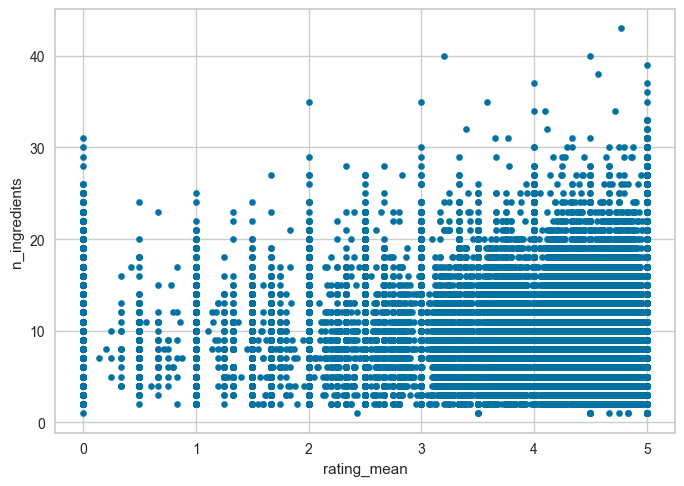

In [26]:
recipe_attributes.plot(x='rating_mean', y='n_ingredients', kind='scatter');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


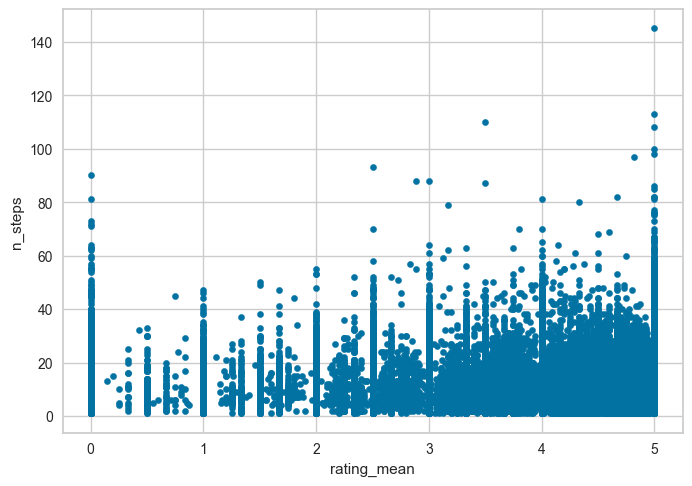

In [27]:
recipe_attributes.plot(x='rating_mean', y='n_steps', kind='scatter');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


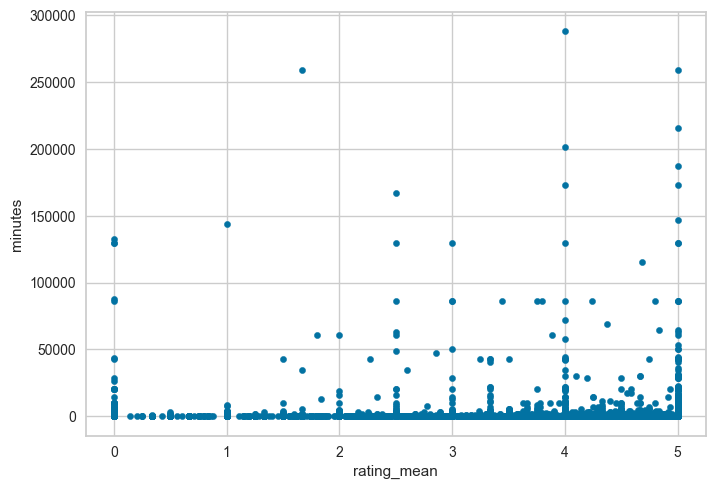

In [28]:
recipe_attributes.plot(x='rating_mean', y='minutes', kind='scatter');

Looking at the plots for each feature we can see that there seems to be a slight inverse relationship between the rating mean and the both the steps and ingredients features. As far as the minutes feature, it doesn’t seem to have a much of a correlation with the rating mean at all.

Because we are dealing with a very large dataframe and I need to closely examine the relationships between individual variables, I am going to split the original datframe and view smaller portions as I continue my analysis.

I want to quickly separate out the attributes that are not word vectorizer features just to take a clean look. I want to examine their place in respect to what I will call the user satisfaction attributes which are the review count and the rating mean for each recipe.

In [29]:
recipe_attributes_sub1=recipe_attributes[['recipe_id', 'minutes','n_steps', 'n_ingredients','rating_mean','review_count','polarity_avg']]

print(recipe_attributes_sub1.head())

  recipe_id  minutes  n_steps  n_ingredients  rating_mean  review_count  \
0    137739       55     11.0            7.0          5.0             3   
1     31490       30      9.0            6.0          3.5             4   
2    112140      130      6.0           13.0          4.0             1   
3     59389       45     11.0           11.0          4.5             2   
4     44061      190      5.0            8.0          5.0             1   

   polarity_avg  
0      0.333095  
1      0.453839  
2      0.569444  
3      0.444015  
4      0.285348  


In [30]:
recipe_attributes_sub1.head()

,recipe_id,minutes,n_steps,n_ingredients,rating_mean,review_count,polarity_avg
0,137739,55,11.0,7.0,5.0,3,0.333095
1,31490,30,9.0,6.0,3.5,4,0.453839
2,112140,130,6.0,13.0,4.0,1,0.569444
3,59389,45,11.0,11.0,4.5,2,0.444015
4,44061,190,5.0,8.0,5.0,1,0.285348


Let’s create a correlation heatmap for this sub dataframe.

C:\Users\jwatki8\AppData\Local\Temp\ipykernel_2068\3374394056.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = recipe_attributes_sub1.corr()


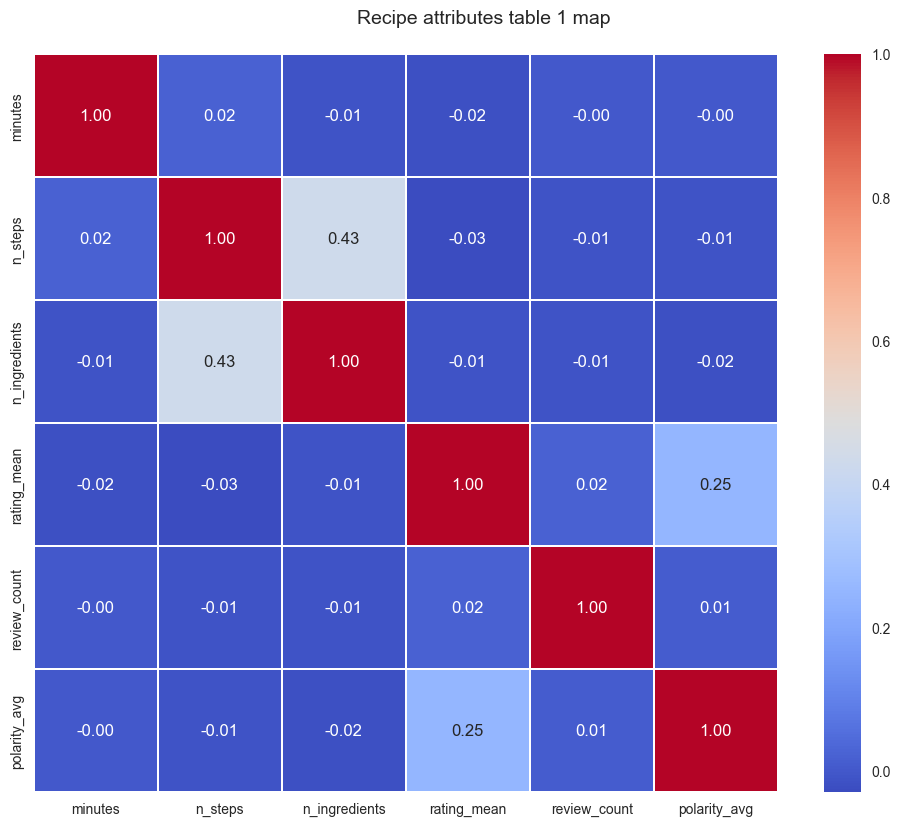

In [31]:
corrmat = recipe_attributes_sub1.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Recipe attributes table 1 map', fontsize=14)

At a glance, there do not appear to be any strong positive or negative correlations among these features. 

Let’s take a look at the variability for this data subset as well.

In [32]:
recipe_attributes_sub1.var()

C:\Users\jwatki8\AppData\Local\Temp\ipykernel_2068\3322471070.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  recipe_attributes_sub1.var()


minutes          3.911583e+06
n_steps          3.594161e+01
n_ingredients    1.394862e+01
rating_mean      9.817073e-01
review_count     3.073910e+02
polarity_avg     3.008146e-02
dtype: float64

It looks like the number of ingredients variable has the lowest variability.

In [33]:
recipe_attributes_sub2=recipe_attributes.drop(columns=['name','minutes', 'contributor_id', 'submitted', 'tags', 'nutrition', 'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients', 'review_count','polarity_avg','avg_review_len'])

print(recipe_attributes_sub2.head())


  recipe_id  rating_mean  step_10  step_15  step_20  step_30  step_350  \
0    137739          5.0      0.0      0.0      0.0      0.0       1.0   
1     31490          3.5      0.0      1.0      0.0      0.0       1.0   
2    112140          4.0      0.0      0.0      0.0      1.0       1.0   
3     59389          4.5      0.0      0.0      0.0      0.0       0.0   
4     44061          5.0      0.0      0.0      0.0      0.0       0.0   

   step_add  step_aside  step_bake  ...  ingr_sugar  ingr_sweet  ingr_tomato  \
0       0.0         0.0        1.0  ...         0.0         0.0          0.0   
1       1.0         1.0        1.0  ...         0.0         0.0          0.0   
2       0.0         1.0        0.0  ...         1.0         0.0          1.0   
3       0.0         0.0        0.0  ...         0.0         0.0          0.0   
4       0.0         0.0        0.0  ...         0.0         0.0          0.0   

   ingr_tomatoes  ingr_vanilla  ingr_vegetable  ingr_vinegar  ingr_water  

Now I would like to make some dimensionality reduction attempts with our word feature variables just to see what shows up in the top features. Let’s apply the random forest model to that portion of the datframe. As a general hypothesis I would expect that the word category with the most feature importance would be ingredients.

In [34]:
df2=recipe_attributes_sub2.drop(['recipe_id','rating_mean'], axis=1)
model = RandomForestRegressor(random_state=3, max_depth=10)
#df2=pd.get_dummies(df2)
model.fit(df2,recipe_attributes_sub2.rating_mean)

RandomForestRegressor(max_depth=10, random_state=3)

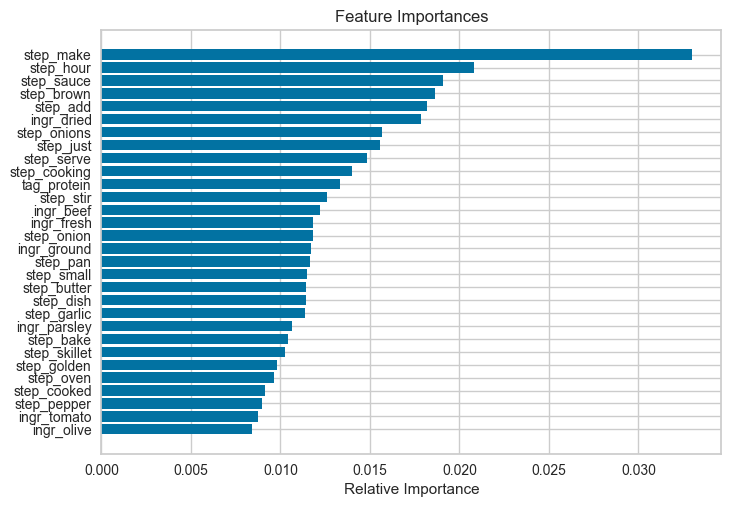

In [35]:
features = df2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-30:] 
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From looking at this feature analysis of the word features we can see that the category most highly represented in the top 30 features is the steps category.  It is representative of the top 5 features and 22 of the total top 30 features. The ingredient features are only representative of 7 out of 30 features and the tags 1 out of 30.

Let’s run a correlation matrix to check for any word features that correlate with or target variable rating mean.

In [36]:
ra_sub2_corr=recipe_attributes_sub2.corr()

C:\Users\jwatki8\AppData\Local\Temp\ipykernel_2068\1220625694.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ra_sub2_corr=recipe_attributes_sub2.corr()


In [37]:
c1 = ra_sub2_corr.abs().unstack()
c1.sort_values(ascending=True, inplace=True)
ra_sub2_highcorr = [(col1, col2,c1[col1,col2]) for col1, col2 in c1.index if c1[col1,col2] > 0.01 and col2 == 'rating_mean']

In [38]:
print(ra_sub2_highcorr)

[('rating_mean', 'rating_mean', 1.0)]


In [39]:
c2 = ra_sub2_corr.abs().unstack()
c2.sort_values(ascending=True, inplace=True)
ra_sub2_highcorr_neg = [(col1, col2,c2[col1,col2]) for col1, col2 in c2.index if c2[col1,col2]< -0.1 and col2 == 'rating_mean']

In [40]:
print(ra_sub2_highcorr_neg)

[]


Since there seems to be no correlation between any of the word features and the rating mean as is. Maybe we should test out creating some higher ngram range word features and test those out.

In [41]:
#try to apply other ngram ranges as features
ingr_vectorizer=CountVectorizer(stop_words='english', ngram_range=(2,2), min_df=0.05,max_df=0.75)
ingr_docs= ingr_vectorizer.fit_transform(raw_recipes['ingredients'])
ingr_features=pd.DataFrame(ingr_docs.todense(),columns=ingr_vectorizer.get_feature_names_out())

In [42]:
ingr_features=ingr_features.add_prefix('ingr_')

In [43]:
step_vectorizer=CountVectorizer(stop_words='english', ngram_range=(2,2), min_df=0.1,max_df=0.75)
step_docs=step_vectorizer.fit_transform(raw_recipes['steps'])
step_features=pd.DataFrame(step_docs.todense(), columns=step_vectorizer.get_feature_names_out())

In [44]:
step_features=step_features.add_prefix('step_')

In [45]:
tag_vectorizer=CountVectorizer(stop_words='english', ngram_range=(2,2), min_df=0.1,max_df=0.75)
tag_docs= tag_vectorizer.fit_transform(raw_recipes['tags'])
tag_features=pd.DataFrame(tag_docs.todense(),columns=tag_vectorizer.get_feature_names_out())

In [46]:
tag_features=tag_features.add_prefix('tag_')

In [47]:
ra_sub2_new=recipe_attributes_sub2[['recipe_id','rating_mean']]

print(ra_sub2_new.head())

  recipe_id  rating_mean
0    137739          5.0
1     31490          3.5
2    112140          4.0
3     59389          4.5
4     44061          5.0


In [48]:
ra_sub2_new=pd.concat([ra_sub2_new, ingr_features], axis=1)

In [49]:
ra_sub2_new=pd.concat([ra_sub2_new, step_features], axis=1)

In [50]:
ra_sub2_new=pd.concat([ra_sub2_new, tag_features], axis=1)

In [51]:
ra_sub2_new=ra_sub2_new.fillna(0)

At first glance this ngram range for word features in these columns give us clearer more descriptive attributes for what the words are referencing.

Now lets try running some of the same feature analysis that we ran on the previous word features. Being that the step features ranked in high importance before I think there is a good change that they will rank highly in this ngram range as well.

In [52]:
df2new=ra_sub2_new.drop(['recipe_id','rating_mean'], axis=1)
model = RandomForestRegressor(random_state=3, max_depth=10)
#df2=pd.get_dummies(df2)
model.fit(df2new,ra_sub2_new.rating_mean)

RandomForestRegressor(max_depth=10, random_state=3)

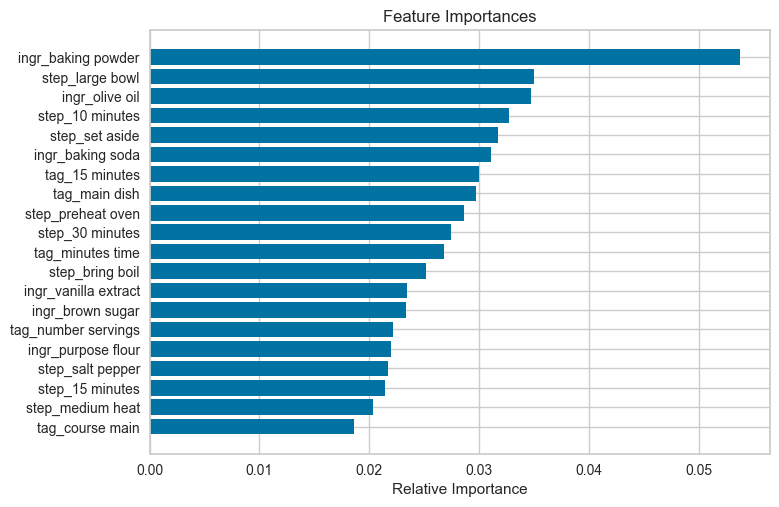

In [53]:
features = df2new.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-20:] 
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Once again step features have the most representation here with 9 of 20 followed by ingredients with 6 of 20 and tags with 5 of 20.

Now to see if we can find any significant correlations with these new word features and the target variable.

In [54]:
ra_sub2_new_corr=ra_sub2_new.corr()

C:\Users\jwatki8\AppData\Local\Temp\ipykernel_2068\2630734939.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ra_sub2_new_corr=ra_sub2_new.corr()


In [55]:
c3 = ra_sub2_new_corr.abs().unstack()
c3.sort_values(ascending=True, inplace=True)
ra_new_highcorr = [(col1, col2,c3[col1,col2]) for col1, col2 in c3.index if c3[col1,col2] > 0.1 and col2 == 'rating_mean']

In [56]:
print(ra_new_highcorr)

[('rating_mean', 'rating_mean', 1.0)]


In [57]:
ra_sub2_new_corr=ra_sub2_new.corr()

C:\Users\jwatki8\AppData\Local\Temp\ipykernel_2068\2630734939.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ra_sub2_new_corr=ra_sub2_new.corr()


In [58]:
c4 = ra_sub2_new_corr.abs().unstack()
c4.sort_values(ascending=True, inplace=True)
ra_new_highcorr_neg = [(col1, col2,c4[col1,col2]) for col1, col2 in c4.index if c4[col1,col2]< -0.1 and col2 == 'rating_mean']

In [59]:
print(ra_sub2_highcorr)

[('rating_mean', 'rating_mean', 1.0)]


Unfortunately, it looks like we are still showing now correlations between the word feature variables and the target variables.

Let's check some of the correlations between the word variables with each other.

In [60]:
ra_corr_df2=ra_sub2_new.corr()

C:\Users\jwatki8\AppData\Local\Temp\ipykernel_2068\643217345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ra_corr_df2=ra_sub2_new.corr()


In [61]:
c5 = ra_corr_df2.abs().unstack()
c5.sort_values(ascending=True, inplace=True)
ra_new_highcorr= [(col1, col2,c5[col1,col2]) for col1, col2 in c5.index if c5[col1,col2]> 0.75 and col1 != col2]

In [62]:
print(ra_new_highcorr)

[('tag_course preparation', 'tag_main ingredient', 0.8004887959897998), ('tag_main ingredient', 'tag_course preparation', 0.8004887959897998), ('tag_north american', 'tag_occasion north', 0.8168682261829797), ('tag_occasion north', 'tag_north american', 0.8168682261829797), ('tag_cholesterol low', 'tag_low cholesterol', 0.849388498635743), ('tag_low cholesterol', 'tag_cholesterol low', 0.849388498635743), ('tag_sodium low', 'tag_low sodium', 0.8637838316199193), ('tag_low sodium', 'tag_sodium low', 0.8637838316199193), ('tag_saturated fat', 'tag_fat low', 0.868974365461166), ('tag_low saturated', 'tag_fat low', 0.868974365461166), ('tag_fat low', 'tag_low saturated', 0.868974365461166), ('tag_fat low', 'tag_saturated fat', 0.868974365461166), ('tag_beginner cook', 'tag_easy beginner', 0.8735069036654094), ('tag_easy beginner', 'tag_beginner cook', 0.8735069036654094), ('tag_cuisine preparation', 'tag_ingredient cuisine', 0.8787260705517415), ('tag_ingredient cuisine', 'tag_cuisine prep

It looks like there are a few tag features that correlate highly with each other. From the descriptions, most of these variables seem to be representative of the same thing just worded a little differently. Looking back none of the top importance features have been from the tag columns so this does make since. A lot of the tag features are highly correlated and therefore don’t have high feature importance. Let’s drop some of those highly correlated features.

In [63]:
upper = ra_sub2_new.corr().where(np.triu(np.ones(ra_sub2_new.corr().shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

C:\Users\jwatki8\AppData\Local\Temp\ipykernel_2068\481906007.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  upper = ra_sub2_new.corr().where(np.triu(np.ones(ra_sub2_new.corr().shape), k=1).astype(np.bool))
C:\Users\jwatki8\AppData\Local\Temp\ipykernel_2068\481906007.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = ra_sub2_new.corr().where(np.triu(np.ones(ra_sub2_new.corr().shape), k=1).astype(np.bool))


In [64]:
ra_sub2_new.drop(to_drop, axis=1, inplace=True)

I would like to take a look at the variance of these features as well.

In [65]:
ra_sub2_new.var()

C:\Users\jwatki8\AppData\Local\Temp\ipykernel_2068\430130837.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ra_sub2_new.var()


rating_mean                   0.981939
ingr_baking powder            0.070355
ingr_baking soda              0.057162
ingr_black pepper             0.116487
ingr_brown sugar              0.094126
ingr_cheddar cheese           0.061198
ingr_cream cheese             0.049630
ingr_garlic cloves            0.102358
ingr_ground black             0.062272
ingr_lemon juice              0.086875
ingr_olive oil                0.151251
ingr_parmesan cheese          0.062254
ingr_purpose flour            0.073628
ingr_salt pepper              0.123220
ingr_sour cream               0.056184
ingr_vanilla extract          0.048318
ingr_vegetable oil            0.058871
step_10 minutes               0.182783
step_15 minutes               0.132912
step_30 minutes               0.127322
step_bring boil               0.115160
step_large bowl               0.121572
step_medium heat              0.146164
step_preheat oven             0.157586
step_salt pepper              0.216295
step_set aside           

The variance for all of these features seem to be on the lower side.

After exploring this data further there aren’t many clear correlations between the features and the target variables. A few observations to note:

1. The ingredient variables don’t seem to carry as much weight as I thought they would. This could be a good thing when trying to find factors influence user interaction outside of cuisine type since ingredients are closely reflect this attribute. 
2. Even though there are no significant correlations, the step features seem to stay at the head of the pack in terms of most important features and features connected to user interactions.
3. It is possible that further feature reduction me help further bring out more important feature reduction and higher correlations with the target variable of the rating mean. 
4. It may also be worth exploring the review polarity as a more intricate target variable to explore correlations with.
